***Link to my github account where I made the submission: https://github.com/nnorukaemeka/piq2019***

### Predictive Sport: probability of goals, shots, and more 


**Context:** 

A football game generates many events and it is very important and interesting to take into account the context in which those events were generated. This dataset should keep sports analytics enthusiasts awake for long hours as the number of questions that can be asked is huge.

Read <a href=http://crabstats.blogspot.com/>these blogs</a> to get a good understanding of soccer/football stats.


**Data description:** 

Nearly 25,000 soccer games from all leagues all over the world. The fields in the data set are: Columns A to E contains information about the league, home and away teams, date etc Columns F, G and H contain the odds for the home win, draw and away win Columns I to BQ contain the team statistics. 

Home team stats are prefixed with a "h" similarly, away team stats are prefixed with an "a". Examples include ladder position (which is a term for a rank in a group -  <a href=https://www.flashscore.com.au/football/europe/euro/standings/> here </a> an example), games played, goals conceded, away games won etc. Columns BR to CA contain final result information. That is the result, the full time result and if available, the half time score as well.

For each game there is: 
1. Statistics on the two teams, such as ladder position, win-loss history, games played 
2. Odds for home win, draw, away win (some-times is zero if odds not available) 
3. The result for that game (including the half time result if available

The dataset ranges from January 2016 to October 2017 and the statistics have been sourced from a few different websites. Odds come from BET365 and the results have been manually entered from http://www.soccerstats.com

Get more insight about the columns in the data by hovering your mouse in front of the names <a href=https://www.soccerstats.com/latest.asp?league=germany3>here</a>

**Data Location:** 
- https://www.kaggle.com/frankpac/soccerdata

---
### Instructions
Based on the scenario outlined above and the data associated with this project, you are required to perform A/B testing and Machine Learning analysis. You must also answer the quiz questions linked with this project. For convenience, the quiz questions are copied below. 

**Deadline:** Please complete the quiz, and submit all the data analysis work you carried out in this jupiter notebook via Github - see instructions below - at the very latest **by 23h59 on Thursday 8 August 2019**. 

**Why this project?**


This project is designed with the two main points in mind


We need to understand your proficiency in the important data science concepts (statistical, algorithmic, and others) and hard skills (advanced programming in python or R)
To give you an additional opportunity to add a few more data science project experience into your portfolio.  


So please put maximum effort to demonstrate your skill in this project. Answer the quiz with diligence, and perform the data analysis as best as you can. 

**Detailed instruction**:

- Git Fork/Clone the project jupyter notebooks and the corresponding data from this github: https://github.com/10acad/piq2019
The jupyter notebook “PredictiveSport.ipynb”, which contains this instruction in the first markdown cell, is for this project.
- The “data/SoccerData.xlsx” excel file is the data for this project
- Following the recommended tasks below, perform Exploratory and predictive analysis on the data.
- At the minimum you must perform an analysis that will allow you to answer some interview questions, visualize features, and produce a model to draw a reasonable conclusion. The more detailed your data analysis and clear answers to the quiz, the better it will be for your selection as 10 Academy Fellow as well as you stand a better chance to get a job interviews. Note that these notebooks and your other work at Github are critical for your Data Science Career - as they are the evidence to your skills. So even after submitting whatever you managed to do by the deadline, keep improving your model and explanations.  
- PLEASE SUBMIT WHATEVER YOU MANAGED TO DO BEFORE THE DEADLINE. WE KNOW THE TIME IS SHORT, AND IT IS FOR A PURPOSE. 
- Upload your jupyter notebook to your Github public repository. If you have forked Github link above, which is what we recommend, then you just have to do the following 
    - git add -u *  #add all modified files tracked by git 
    - git commit -m ‘submit’ 
    - git push
- Copy the Github link to your version of “PredictiveSport.ipynb” and paste it here (the 10 Academy quiz page). If you prefer, there is also a possibility to directly upload your jupyter notebook.
- If you have any questions or confusions regarding what you are expected to do in this project or how to submit, please contact community@10academy.org well before the deadline.


### Objectives:

**Exploratory analysis:**
- Understand which leagues & teams are represented in this data set - use histograms, pandas groupbys to get ideas on this 
- Explain if playing at home have a higher chance of winning? What about draws and loses?
<p style="color:blue;font-size:11pt;">Answer: It is seen from the Bar plot that playing at home have a higher chance of winning </p>
- Explain how are predicted odds correlated to final results? 
- How many teams played more than 10 games (at home or away)?
- How are the home or away statistics distributed? Is there an imbalance in the data set?
- Be creative and explore the data set, make histograms, line (trend) plots to understand the nature of the data


**Predictive analysis:** 
- Which column has the most missing values (note that the *_odds columns are zero when no data is available)?
- Is it feasible to drop all rows with missing values? If not, try to fill missing values with an appropriate strategy.
- drop columns with greater than 50% missing values
- consider dropping teams with  
- split the data into training (60%), validation(30%) and test(10%) 
- There are 81 columns, explain which columns are highly correlated? (you may get insight on this from your exploratory analysis, plotting covariance matrices) 
- Create predictive models for football games in order to bet on football outcomes. This involves training a model for a subset of features e.g. (home,odd,ladder), and predicting a target variable e.g. win, draw, loss. Consider the following three algorithms. Comment on the relative performance if you are able to run two or three of them 
    - random forest classifier
    - xgboost 
    - neural networks
- make visualizations predicted outcomes (wins vs losses) together with the ground truth for the validation set
- make sure your model is not overfitting the training data - the statistical precision you would obtain running your model on the training data should be statistically similar to the validation data. Otherwise, the model is not generalizing (overfitting the training set)  


- Given your exploratory and predictive analysis, comment on what else you can do with the current data?

# SOLUTION  TO THE OBJECTIVE

## Import the Libraries

In [1]:
import sys
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Makes graph display in notebook
%matplotlib inline   

#ignore warnings
#import warnings
#def ignore_warn(*args, **kwargs):
#    pass 
#warnings.warn = ignore_warn()

## Import the Data
I will use the pd.read_excel() function to read the Excel sheet.

In [2]:
#Import the Data
df = pd.read_excel("data/SoccerData.xlsx")

### Display the Data
I will use the head() function to display the first 5 rows of the data

In [3]:
df.head(5)

,league,teams_no,date,home_team,away_team,home_odd,draw_odd,away_odd,h_played,a_played,...,a_final,h_half,a_half,BTS,H1H,A1H,H2H,A2H,Unnamed: 79,Unnamed: 80
0,France-Ligue 2,20,2016-01-08,Ajaccio,Le Havre,2.63,2.97,3.24,19,19,...,1.0,NaN,NaN,1,0.0,0.0,0.0,0.0,NaN,NaN
1,France-Ligue 2,20,2016-01-08,Auxerre,Valenciennes,1.98,3.25,4.69,19,19,...,1.0,NaN,NaN,1,0.0,0.0,0.0,0.0,NaN,NaN
2,France-Ligue 2,20,2016-01-08,Bourg Peronnas,Creteil,2.00,3.52,4.14,19,19,...,1.0,NaN,NaN,1,0.0,0.0,1.0,0.0,NaN,NaN
3,France-Ligue 2,20,2016-01-08,Chamois,Dijon,2.82,3.06,2.91,19,19,...,2.0,NaN,NaN,1,0.0,0.0,0.0,0.0,NaN,NaN
4,France-Ligue 2,20,2016-01-08,Clermont,Evian,2.10,3.21,4.20,19,19,...,1.0,NaN,NaN,1,0.0,0.0,1.0,0.0,NaN,NaN


### Explore the Data

In [4]:
#Display the number of rows and columns
df.shape

(24830, 81)

In [5]:
#Display the data-types of the two sets
#df.dtypes

In [6]:
#df.describe()

In [7]:
df["home_team"].unique()

array(['Ajaccio', 'Auxerre', 'Bourg Peronnas', ..., 'Ankaran',
       'Sheffield Wednesday', 'FC Torino'], dtype=object)

## DATA VISUALIZATION

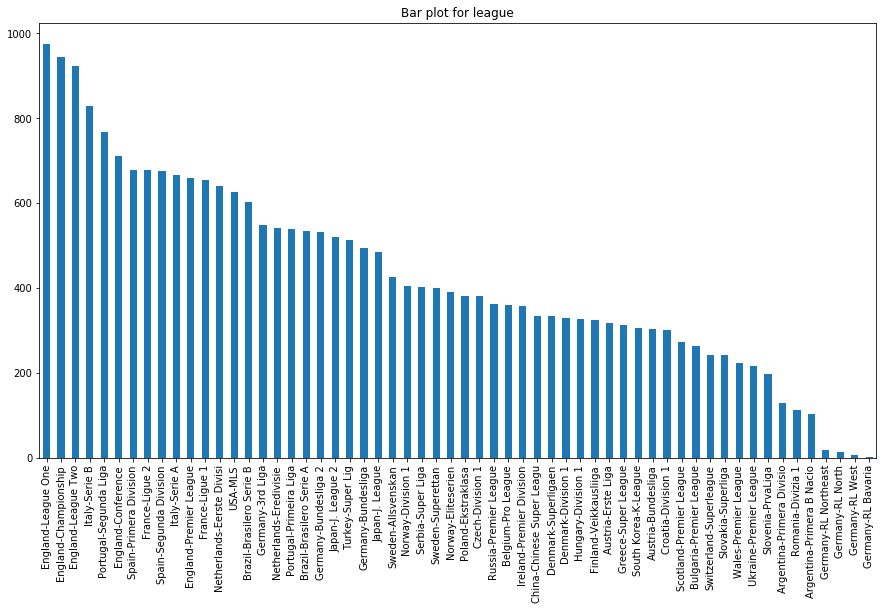

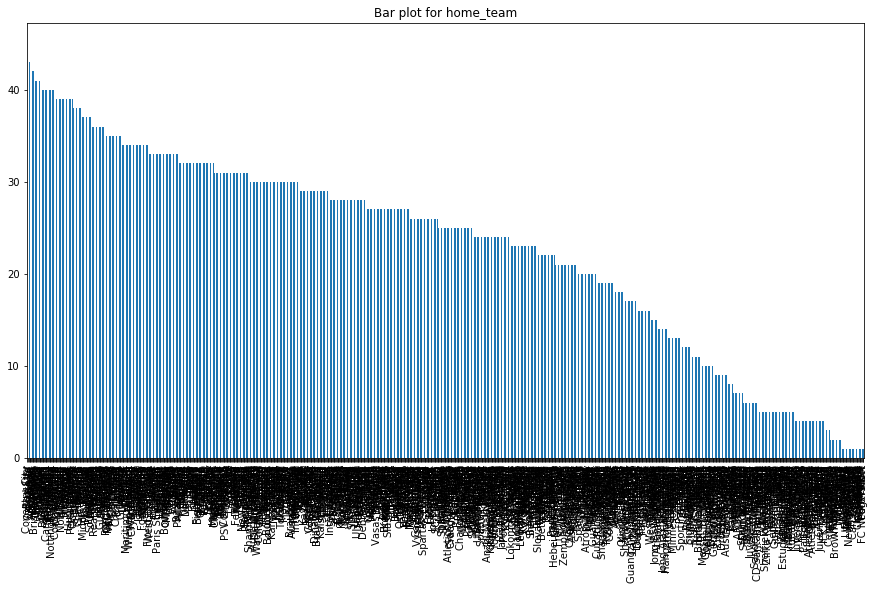

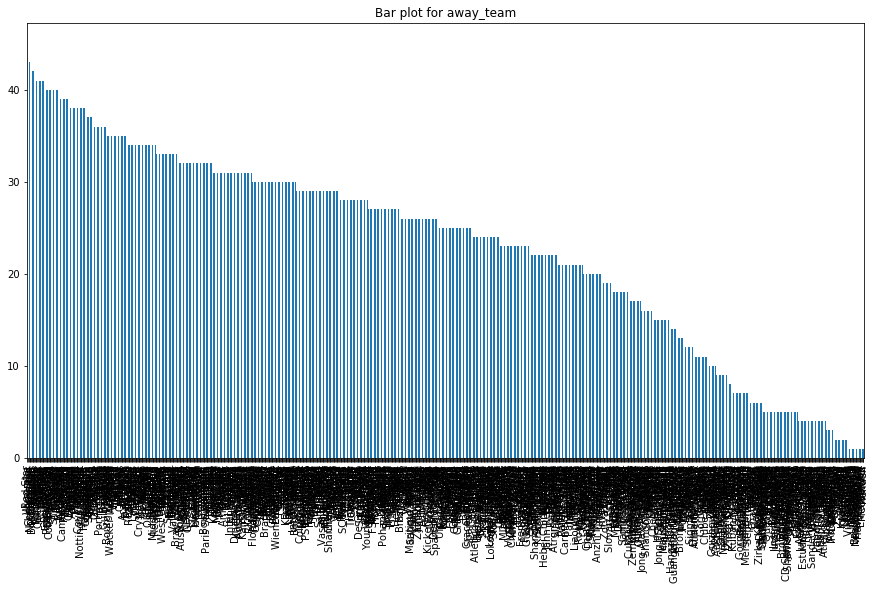

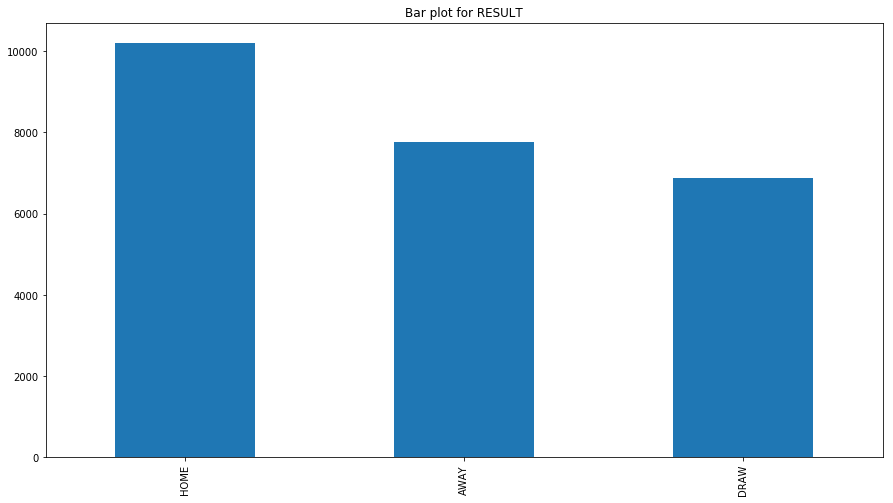

In [8]:
# BAR PLOT AMONG CATEGORICAL FEATURES
cat_cols = ["league", "home_team", "away_team", "RESULT"]

for col in cat_cols:
    fig = plt.figure(figsize=(15,8)) # define plot area
    ax = fig.gca() # define axis  
    
    counts = df[col].value_counts() # find the counts for each unique category
    counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
    ax.set_title('Bar plot for ' + col)

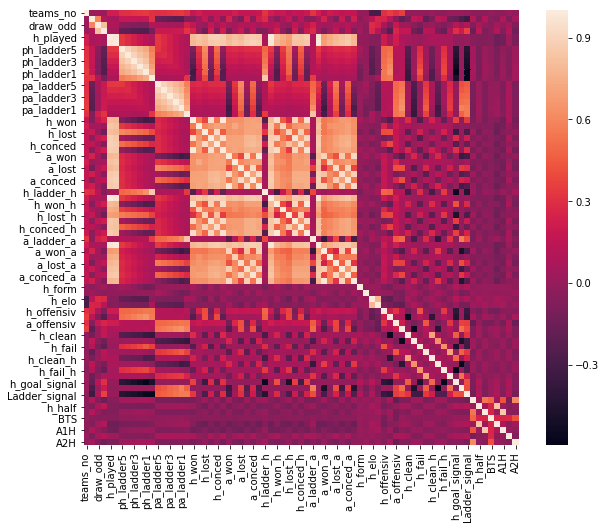

In [9]:
#CORRELATION MATRIX AMONG FEATURES
corrmat = df.corr()
f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(corrmat, square=True)

### Checking and Filling the Missing Data

In [10]:
#check for missing data
print(df.isnull().sum())

league               0
teams_no             0
date                 0
home_team            0
away_team            0
home_odd             0
draw_odd             0
away_odd             0
h_played             0
a_played             0
ph_ladder5           0
ph_ladder4           0
ph_ladder3           0
ph_ladder2           0
ph_ladder1           0
h_ladder             0
pa_ladder5           0
pa_ladder4           0
pa_ladder3           0
pa_ladder2           0
pa_ladder1           0
a_ladder             0
h_won                0
h_drawn              0
h_lost               0
h_scored             0
h_conced             0
h_points             0
a_won                0
a_drawn              0
                 ...  
a_form               0
h_elo                0
a_elo                0
h_offensiv           0
h_defensiv           0
a_offensiv           0
a_defensiv           0
h_clean              0
a_clean              0
h_fail               0
a_fail               0
h_clean_h            0
a_clean_a  

In [11]:
# Compare missing data with their corresponding count to see if it is feasible to drop all rows with missing values
# Columns with missing data greater than 50% will be dropped.
missing_col = ["h_goal_signal", "a_goal_signal", "a_final", "h_half", "a_half", "H1H", "A1H", "H2H", "A2H", "Unnamed: 79", "Unnamed: 80"]
for col in missing_col:
    print("count_for_", col)
    print(df[col].count())
    print("missing value_for_", col)
    print(df[col].isnull().sum())
    if df[col].isnull().sum() > 0.5*(df[col].count()):
        print("Missing value is greater than 50%, therefore I drop ", col)
        df.drop([col], axis=1, inplace=True)
        print("\n")
    else:
        print("Missing value is less than 50%, therefore I compute mean and fill the missing values with calculated mean")
        mean_pw = df[col].mean() #compute the mean
        df[col].fillna(mean_pw, inplace=True) #Fill the missing values with calculated mean
        print("\n")



count_for_ h_goal_signal
23823
missing value_for_ h_goal_signal
1007
Missing value is less than 50%, therefore I compute mean and fill the missing values with calculated mean


count_for_ a_goal_signal
23834
missing value_for_ a_goal_signal
996
Missing value is less than 50%, therefore I compute mean and fill the missing values with calculated mean


count_for_ a_final
24820
missing value_for_ a_final
10
Missing value is less than 50%, therefore I compute mean and fill the missing values with calculated mean


count_for_ h_half
15729
missing value_for_ h_half
9101
Missing value is greater than 50%, therefore I drop  h_half


count_for_ a_half
15729
missing value_for_ a_half
9101
Missing value is greater than 50%, therefore I drop  a_half


count_for_ H1H
17365
missing value_for_ H1H
7465
Missing value is less than 50%, therefore I compute mean and fill the missing values with calculated mean


count_for_ A1H
17365
missing value_for_ A1H
7465
Missing value is less than 50%, therefore I 

From the result, we see that:
   - columns ("h_half", "a_half", "Unnamed: 79" and "Unnamed: 80") are removed because their missing values are more than 50% of their total count. 
   - While, for columns ('h_goal_signal', 'a_goal_signal', 'a_final', 'H1H', 'A1H', 'H2H', 'A2H'), the mean for each column was computed, and the missing values in each column was filled with the corresponding calculated mean.

In [12]:
#Check if filling is successful
df.isnull().sum()

league           0
teams_no         0
date             0
home_team        0
away_team        0
home_odd         0
draw_odd         0
away_odd         0
h_played         0
a_played         0
ph_ladder5       0
ph_ladder4       0
ph_ladder3       0
ph_ladder2       0
ph_ladder1       0
h_ladder         0
pa_ladder5       0
pa_ladder4       0
pa_ladder3       0
pa_ladder2       0
pa_ladder1       0
a_ladder         0
h_won            0
h_drawn          0
h_lost           0
h_scored         0
h_conced         0
h_points         0
a_won            0
a_drawn          0
                ..
a_scored_a       0
a_conced_a       0
a_points_a       0
h_form           0
a_form           0
h_elo            0
a_elo            0
h_offensiv       0
h_defensiv       0
a_offensiv       0
a_defensiv       0
h_clean          0
a_clean          0
h_fail           0
a_fail           0
h_clean_h        0
a_clean_a        0
h_fail_h         0
a_fail_a         0
h_goal_signal    0
a_goal_signal    0
Ladder_signa

In [13]:
# mean_col = ['h_goal_signal', 'a_goal_signal', 'a_final', 'H1H', 'A1H', 'H2H', 'A2H']
# print(df[mean_col])

df.head(3)

,league,teams_no,date,home_team,away_team,home_odd,draw_odd,away_odd,h_played,a_played,...,a_goal_signal,Ladder_signal,RESULT,h_final,a_final,BTS,H1H,A1H,H2H,A2H
0,France-Ligue 2,20,2016-01-08,Ajaccio,Le Havre,2.63,2.97,3.24,19,19,...,-0.200000,-14,DRAW,1,1.0,1,0.0,0.0,0.0,0.0
1,France-Ligue 2,20,2016-01-08,Auxerre,Valenciennes,1.98,3.25,4.69,19,19,...,0.333333,9,DRAW,1,1.0,1,0.0,0.0,0.0,0.0
2,France-Ligue 2,20,2016-01-08,Bourg Peronnas,Creteil,2.00,3.52,4.14,19,19,...,0.400000,5,HOME,5,1.0,1,0.0,0.0,1.0,0.0


## Training and Testing Sets